# **Foundations of Data Science (CSF320) - Assignment 2**
### **Authors:** Anirudh A (2018B4A70936H), Vishal Kumar NK (2019A4PS0693H), Shivani Thirunagari (2019A4PS0754H)
# **Loading Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from random import randrange
import math
path = "/content/drive/MyDrive/FoDS-Assignment-2.csv"
df = pd.read_csv(path)
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,4,1.75,2120.0,7420,1.0,0,0,4,7,1060.0,1060,1540,7420,453000.0
1,4,2.50,2180.0,9861,2.0,0,2,3,8,2180.0,0,2390,9761,480000.0
2,3,1.50,1540.0,9800,1.0,0,0,3,7,1010.0,530,1600,8250,180500.0
3,3,3.50,2380.0,6250,2.0,0,3,3,8,1670.0,710,2540,4010,495000.0
4,4,2.50,2230.0,8500,2.0,0,0,3,8,2230.0,0,2270,8770,325000.0


# **Data Pre-Processing**

### Outlier Detection, Elemination 

In [3]:
df["price"]

0       453000.0
1       480000.0
2       180500.0
3       495000.0
4       325000.0
          ...   
1183    333000.0
1184    450000.0
1185    776000.0
1186    400000.0
1187    369500.0
Name: price, Length: 1188, dtype: float64

In [4]:
df = df[abs((df["price"]-df["price"].mean()) < 3* df["price"].std())]
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,4,1.75,2120.0,7420,1.0,0,0,4,7,1060.0,1060,1540,7420,453000.0
1,4,2.50,2180.0,9861,2.0,0,2,3,8,2180.0,0,2390,9761,480000.0
2,3,1.50,1540.0,9800,1.0,0,0,3,7,1010.0,530,1600,8250,180500.0
3,3,3.50,2380.0,6250,2.0,0,3,3,8,1670.0,710,2540,4010,495000.0
4,4,2.50,2230.0,8500,2.0,0,0,3,8,2230.0,0,2270,8770,325000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,4,2.50,2623.0,7184,2.0,0,0,3,8,2623.0,0,2010,4939,333000.0
1184,2,2.00,1730.0,4248,2.0,0,0,3,7,1730.0,0,1380,4000,450000.0
1185,4,2.50,3040.0,6425,2.0,0,0,3,8,3040.0,0,3040,7800,776000.0
1186,4,1.50,2150.0,11026,1.0,0,0,4,7,2150.0,0,1760,10283,400000.0


### Min-Max Normalization

In [5]:
# It rescales the data to a range of [0,1]. 
# Subtract min value, divide by range.
for i in df.columns:
    df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())   
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,0.428571,0.227273,0.238965,0.004074,0.0,0.0,0.00,0.666667,0.285714,0.108511,0.482696,0.209596,0.015255,0.215723
1,0.428571,0.363636,0.248097,0.005552,0.5,0.0,0.50,0.333333,0.428571,0.346809,0.000000,0.424242,0.020768,0.232704
2,0.285714,0.181818,0.150685,0.005515,0.0,0.0,0.00,0.333333,0.285714,0.097872,0.241348,0.224747,0.017210,0.044340
3,0.285714,0.545455,0.278539,0.003365,0.5,0.0,0.75,0.333333,0.428571,0.238298,0.323315,0.462121,0.007225,0.242138
4,0.428571,0.363636,0.255708,0.004728,0.5,0.0,0.00,0.333333,0.428571,0.357447,0.000000,0.393939,0.018434,0.135220


### Check Missing Values

In [6]:
df.dropna(inplace=True)
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,0.428571,0.227273,0.238965,0.004074,0.0,0.0,0.00,0.666667,0.285714,0.108511,0.482696,0.209596,0.015255,0.215723
1,0.428571,0.363636,0.248097,0.005552,0.5,0.0,0.50,0.333333,0.428571,0.346809,0.000000,0.424242,0.020768,0.232704
2,0.285714,0.181818,0.150685,0.005515,0.0,0.0,0.00,0.333333,0.285714,0.097872,0.241348,0.224747,0.017210,0.044340
3,0.285714,0.545455,0.278539,0.003365,0.5,0.0,0.75,0.333333,0.428571,0.238298,0.323315,0.462121,0.007225,0.242138
4,0.428571,0.363636,0.255708,0.004728,0.5,0.0,0.00,0.333333,0.428571,0.357447,0.000000,0.393939,0.018434,0.135220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,0.428571,0.363636,0.315525,0.003931,0.5,0.0,0.00,0.333333,0.428571,0.441064,0.000000,0.328283,0.009413,0.140252
1184,0.142857,0.272727,0.179604,0.002152,0.5,0.0,0.00,0.333333,0.285714,0.251064,0.000000,0.169192,0.007201,0.213836
1185,0.428571,0.363636,0.378995,0.003471,0.5,0.0,0.00,0.333333,0.428571,0.529787,0.000000,0.588384,0.016150,0.418868
1186,0.428571,0.181818,0.243531,0.006258,0.0,0.0,0.00,0.666667,0.285714,0.340426,0.000000,0.265152,0.021998,0.182390


### Data Shuffling

In [7]:
df = df.sample(frac = 1) #frac denotes the fraction of samples to be returned. 
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
995,0.428571,0.545455,0.550989,0.002197,0.5,0.0,0.0,0.333333,0.571429,0.508511,0.560109,0.570707,0.009373,0.440252
1124,0.428571,0.363636,0.538813,0.006379,0.5,0.0,0.0,0.333333,0.714286,0.753191,0.000000,0.707071,0.018416,0.487421
835,0.285714,0.363636,0.117504,0.003217,0.5,0.0,0.0,0.333333,0.285714,0.164255,0.000000,0.184343,0.013786,0.066038
1090,0.285714,0.363636,0.144597,0.004062,0.5,0.0,0.0,0.333333,0.428571,0.202128,0.000000,0.255051,0.014669,0.094340
529,0.285714,0.363636,0.304414,0.003940,0.5,0.0,0.5,0.333333,0.714286,0.425532,0.000000,0.333333,0.006024,0.811321


### Train-Test (70-30 Split)

In [8]:
training_data = df.sample(frac=0.7, random_state=25) #Training data = 70%
testing_data = df.drop(training_data.index) #Testing data = 30%

print("Original data size:", df.shape[0])
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

Original data size: 1126
No. of training examples: 788
No. of testing examples: 338


In [9]:
X_train = np.array(training_data.iloc[:,:-1])
X_test = np.array(testing_data.iloc[:,:-1])
Y_train = np.array(training_data.iloc[:,-1])
Y_test = np.array(testing_data.iloc[:,-1])
X_train.shape

(788, 13)

# **Linear Regression Model - Gradient Descent (Convergence Criteria)**





In [10]:
#Parameter Initialization
m = Y_train.shape[0]
def initialize_params(X, numberOfFeatures):
  ones = np.ones((m,1)) #Bias
  X_new = np.hstack((ones, X)) #Add the bias 
  thetha = np.zeros((numberOfFeatures+1, 1))
  return X_new, thetha

In [11]:
X_train, thetha = initialize_params(X_train, 13)

In [12]:
#Function to compute cost at each step of GD. 
def compute_cost(thetha, X, y):
  J = np.sum((np.matmul(X, thetha)-y)**2) #Sum of squares of error using vectorization
  J = J/2
  return J

In [13]:
#Gradient Descent Function - Using Number of iterations
def GD(X, y, thetha, alpha): 
  pE = 100000 #Error from previous iteration. 
  E = 10000 #Error from current iteration. 
  while abs(E-pE)>0.001:
    pE = E 
    thetha = thetha - ((alpha/m)*np.matmul(X.T, (np.matmul(X,thetha))-y))
    E = compute_cost(thetha, X, y) #Current iteration's error
  return E
    

In [14]:
#Gradient Descent Function - Using Number of iterations
#def gradientDescent (X, y, thetha, alpha, XT, YT):
def gradientDescent (X, y, thetha, alpha):
  n_iters = 50
  for i in range(n_iters):
    thetha = thetha - ((alpha/m)*np.matmul(X.T, (np.matmul(X,thetha))-y))
  J_history = compute_cost(thetha, X, y) #Error
  return J_history


In [15]:
J_history = GD(X_train, Y_train, thetha, 0.1) #Learning rate = 0.1
J_history

0.8857698470793779

# **Forward Greedy**

In [16]:
import matplotlib.pyplot as plt
X_train.shape #First feature is bias - only 1s. 

(788, 14)

In [17]:
modelRMSE = [] #Stores RMSE value of best n-feature model. 
featuresSoFar = []
featuresRemaining = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
J = [100] #List of size 1 - Since integers cant be concatenated with lists directly.  

for i in range(1,14): #Exclude bias feature. 
  minRMSE = float("inf")
  featureChosen = featuresRemaining[0] #initialization
  for j in featuresRemaining:
    J[0] = j
    X_train_iter, thetha = initialize_params(X_train[:, featuresSoFar+J], i) 
    #temp = gradientDescent(X_train_iter, Y_train, thetha, 0.1)
    temp = GD(X_train_iter, Y_train, thetha, 0.1)
    temp = np.sqrt(temp/788) #RMSE from SSE 
    if temp<minRMSE:
      minRMSE = temp
      featureChosen = j
  featuresSoFar.append(featureChosen)
  modelRMSE.append(minRMSE)
  featuresRemaining.remove(featureChosen)

  #Print Results
  print("Number of features:", i, "Training RMSE Value:", minRMSE)

Number of features: 1 Training RMSE Value: 0.0023537454554710424
Number of features: 2 Training RMSE Value: 0.0032339588778994535
Number of features: 3 Training RMSE Value: 0.010021474707442047
Number of features: 4 Training RMSE Value: 0.011413323782590929
Number of features: 5 Training RMSE Value: 0.014514578806115374
Number of features: 6 Training RMSE Value: 0.015432001909285493
Number of features: 7 Training RMSE Value: 0.016332854499717647
Number of features: 8 Training RMSE Value: 0.016759164246494852
Number of features: 9 Training RMSE Value: 0.014918373847895697
Number of features: 10 Training RMSE Value: 0.01867030291432725
Number of features: 11 Training RMSE Value: 0.023130155767280232
Number of features: 12 Training RMSE Value: 0.029009255894417375
Number of features: 13 Training RMSE Value: 0.0335272040289555


# **Backward Greedy**

In [18]:
modelRMSE = [] #Stores RMSE value of best n-feature model. 
featuresSoFar = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
J = [100] #List of size 1 - Since integers cant be concatenated with lists directly.  

for i in range(13, 0, -1): #Exclude bias feature. 
  minRMSE = float("inf")
  featureChosen = featuresSoFar[0] #initialization
  for j in featuresSoFar:
    tempArr = []
    for p in range(len(featuresSoFar)):
      if j!=featuresSoFar[p]:
        tempArr.append(featuresSoFar[p])

    X_train_iter, thetha = initialize_params(X_train[:, tempArr], i-1) #If prev model had i features, next will have i-1 features. 
    #temp = gradientDescent(X_train_iter, Y_train, thetha, 0.1)
    temp = GD(X_train_iter, Y_train, thetha, 0.1)
    temp = np.sqrt(temp/788) #RMSE from SSE 
    if temp<minRMSE:
      minRMSE = temp
      featureChosen = j
  featuresSoFar.remove(featureChosen)
  modelRMSE.append(minRMSE)

  #Print Results
  print("Number of features:", i-1,  "Training RMSE Value:", minRMSE)

Number of features: 12 Training RMSE Value: 0.029009255894417354
Number of features: 11 Training RMSE Value: 0.023130155767280235
Number of features: 10 Training RMSE Value: 0.01867030291432726
Number of features: 9 Training RMSE Value: 0.014918373847895726
Number of features: 8 Training RMSE Value: 0.014651376557396133
Number of features: 7 Training RMSE Value: 0.013890145797992812
Number of features: 6 Training RMSE Value: 0.01317656594599393
Number of features: 5 Training RMSE Value: 0.013114229015425348
Number of features: 4 Training RMSE Value: 0.013071536466686504
Number of features: 3 Training RMSE Value: 0.013046757380294302
Number of features: 2 Training RMSE Value: 0.015355388226472408
Number of features: 1 Training RMSE Value: 0.015348216930709611
Number of features: 0 Training RMSE Value: 0.0022288947780511634


# **Testing RMSE Calculations (Iterations Method)**

In [19]:
#Parameter Initialization
p = Y_test.shape[0]
def initialize_test_params(X, numberOfFeatures):
  ones = np.ones((p,1)) #Bias
  X_new = np.hstack((ones, X)) #Add the bias 
  thetha = np.zeros((numberOfFeatures+1, 1))
  return X_new, thetha

In [20]:
X_test.shape

(338, 13)

In [21]:
X_test, thetha1 = initialize_test_params(X_test, 13)
X_test.shape

(338, 14)

In [22]:
def gradientDescent (X, y, thetha, alpha):
  n_iters = 200
  for i in range(n_iters):
    thetha = thetha - ((alpha/m)*np.matmul(X.T, (np.matmul(X,thetha))-y))
  TestError = compute_cost(thetha, X, y) #Error
  return TestError


In [23]:
t = gradientDescent(X_test, Y_test, thetha1, 0.1) #Learning rate = 0.1
t

92.23485547272203

In [24]:
#Forward Greedy
modelTestRMSE = [] #Stores RMSE value of best n-feature model. 
featuresSoFar = []
featuresRemaining = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
J = [100] #List of size 1 - Since integers cant be concatenated with lists directly.  

for i in range(1,14): #Exclude bias feature. 
  minRMSE = float("inf")
  featureChosen = featuresRemaining[0] #initialization
  for j in featuresRemaining:
    J[0] = j
    X_test_iter, thetha = initialize_test_params(X_test[:, featuresSoFar+J], i) 
    temp = gradientDescent(X_test_iter, Y_test, thetha, 0.1)
    #temp = GD(X_train_iter, Y_train, thetha, 0.1)
    temp = np.sqrt(temp/788) #RMSE from SSE 
    if temp<minRMSE:
      minRMSE = temp
      featureChosen = j
  featuresSoFar.append(featureChosen)
  modelTestRMSE.append(minRMSE)
  featuresRemaining.remove(featureChosen)

  #Print Results
  print("Number of features:", i, "Best features chosen for the model:", featuresSoFar, "Testing RMSE Value:", minRMSE)

Number of features: 1 Best features chosen for the model: [9] Testing RMSE Value: 0.24552178654835394
Number of features: 2 Best features chosen for the model: [9, 1] Testing RMSE Value: 0.2326631630796311
Number of features: 3 Best features chosen for the model: [9, 1, 13] Testing RMSE Value: 0.23260051864950118
Number of features: 4 Best features chosen for the model: [9, 1, 13, 6] Testing RMSE Value: 0.2326005186495012
Number of features: 5 Best features chosen for the model: [9, 1, 13, 6, 4] Testing RMSE Value: 0.23262246266948872
Number of features: 6 Best features chosen for the model: [9, 1, 13, 6, 4, 7] Testing RMSE Value: 0.233265670234442
Number of features: 7 Best features chosen for the model: [9, 1, 13, 6, 4, 7, 8] Testing RMSE Value: 0.23613737900960288
Number of features: 8 Best features chosen for the model: [9, 1, 13, 6, 4, 7, 8, 11] Testing RMSE Value: 0.24780702880995392
Number of features: 9 Best features chosen for the model: [9, 1, 13, 6, 4, 7, 8, 11, 2] Testing R

4-features models is the best. The optimal features are Grade, Condition, Waterfront, SqftLot


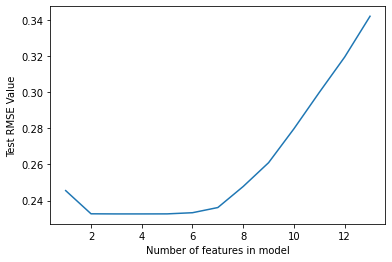

In [25]:
plt.plot(np.arange(1, 14), modelTestRMSE)
plt.xlabel ("Number of features in model")
plt.ylabel ("Test RMSE Value")
print("4-features models is the best. The optimal features are Grade, Condition, Waterfront, SqftLot")

In [26]:
#Parameter Initialization
#p = X_test.shape[0]
def initialize_test_params(X, numberOfFeatures):
  ones = np.ones((338,1)) #Bias
  X_new = np.hstack((ones, X)) #Add the bias 
  thetha = np.zeros((numberOfFeatures+1, 1))
  return X_new, thetha

In [27]:
#Backward Greedy
modelRMSE = [] #Stores RMSE value of best n-feature model. 
featuresSoFar = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
J = [100] #List of size 1 - Since integers cant be concatenated with lists directly.  

for i in range(13, 0, -1): #Exclude bias feature. 
  minRMSE = float("inf")
  featureChosen = featuresSoFar[0] #initialization
  for j in featuresSoFar:
    tempArr = []
    for p in range(len(featuresSoFar)):
      if j!=featuresSoFar[p]:
        tempArr.append(featuresSoFar[p])

    X_test_iter, thetha = initialize_test_params(X_test[:, tempArr], i-1) #If prev model had i features, next will have i-1 features. 
    temp = gradientDescent(X_test_iter, Y_test, thetha, 0.1)
    #temp = GD(X_train_iter, Y_train, thetha, 0.1)
    temp = np.sqrt(temp/788) #RMSE from SSE 
    if temp<minRMSE:
      minRMSE = temp
      featureChosen = j
  featuresSoFar.remove(featureChosen)
  modelRMSE.append(minRMSE)

  #Print Results
  print("Number of features:", i-1, "Best features chosen for the model:", featuresSoFar, "Feature Removed:", featureChosen, "Testing RMSE Value:", minRMSE)

Number of features: 12 Best features chosen for the model: [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13] Feature Removed: 10 Testing RMSE Value: 0.3195213596384551
Number of features: 11 Best features chosen for the model: [1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13] Feature Removed: 9 Testing RMSE Value: 0.2971242594918011
Number of features: 10 Best features chosen for the model: [1, 2, 4, 5, 6, 7, 8, 11, 12, 13] Feature Removed: 3 Testing RMSE Value: 0.27776935640096856
Number of features: 9 Best features chosen for the model: [1, 4, 5, 6, 7, 8, 11, 12, 13] Feature Removed: 2 Testing RMSE Value: 0.25968666128841994
Number of features: 8 Best features chosen for the model: [1, 4, 5, 6, 7, 8, 11, 13] Feature Removed: 12 Testing RMSE Value: 0.25266298527149134
Number of features: 7 Best features chosen for the model: [1, 4, 5, 6, 7, 8, 13] Feature Removed: 11 Testing RMSE Value: 0.2476229813267331
Number of features: 6 Best features chosen for the model: [1, 4, 6, 7, 8, 13] Feature Removed: 5 Testin

6-features models is the best. The optimal features are: Bedrooms, SqftLot, View, WaterFront, Condition, SqFtLot15


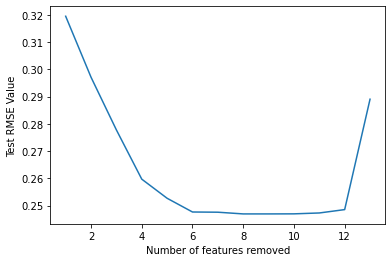

In [29]:
plt.plot(np.arange(1, 14), modelRMSE)
plt.xlabel ("Number of features removed")
plt.ylabel ("Test RMSE Value")
print("6-features models is the best. The optimal features are: Bedrooms, SqftLot, View, WaterFront, Condition, SqFtLot15")

# **Conclusion:** 
A total of 6 models have been built - Based on 1)Forward Greedy, 2)Backward Greedy, 3)All Features (Each model was built once using number of iterations as the stopping criteria and once using convergence as the stopping criteria). 
The subset of features have been chosen based on the Testing RMSE values. Using forward greedy, an optimal of 4 features (Grade, Condition, Waterfront, SqftLot) was obtained and using backward greedy, an optimal of 6 features (Bedrooms, SqftLot, View, WaterFront, Condition, SqFtLot15) has been obtained. A U-shaped graph in both the cases indicates that testing error is high when very features or very high number of features are chosen (due to over-fitting and redundancy/correlation respectively). 
The testing error is also high when a model is built withpout performing any feature selection/pre-processing technique. In fact, an error of infinity can be obtained if Nan values are not removed before applying the model. 
